In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Modeling Exercises

In [4]:
df = pd.read_csv('saas.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
Month_Invoiced       790458 non-null object
Customer_Id          790458 non-null int64
Invoice_Id           790458 non-null int64
Subscription_Type    790458 non-null float64
Amount               790458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [10]:
df.head(2)

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0


In [18]:
df['Month_Invoiced'] = pd.to_datetime(df['Month_Invoiced'])

In [22]:
# df.set_index('Month_Invoiced', inplace = True)

In [23]:
df.head(2)

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0


### 1 Split data (train/test) and resample by any period, except daily, and aggregate using the sum.

In [24]:
print(df.index.min())
print(df.index.max())

2014-01-31 00:00:00
2017-12-31 00:00:00


In [27]:
train = df[:'2016']
test = df['2017':]
train.shape, test.shape, train.index.min(), train.index.max(), test.index.min(), test.index.max()

((618169, 4),
 (172289, 4),
 Timestamp('2014-01-31 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-12-31 00:00:00'))

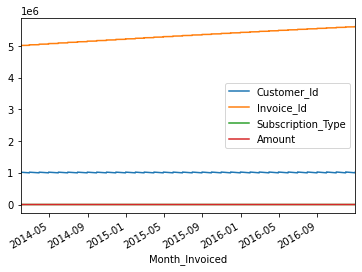

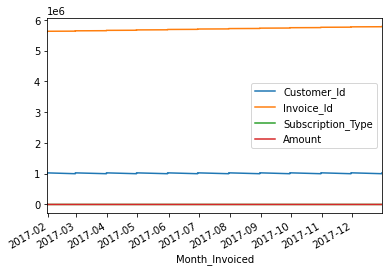

In [28]:
train.plot()
test.plot()